# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorther... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


## Creating data to view and fit

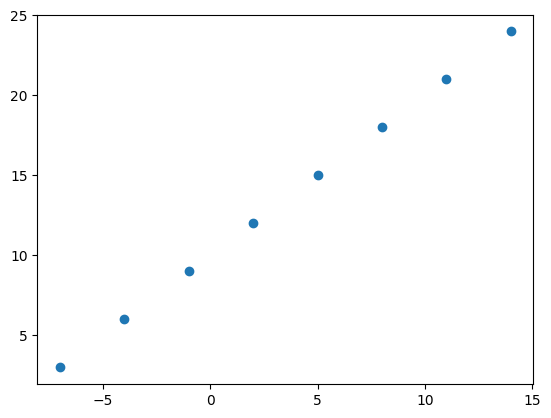

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

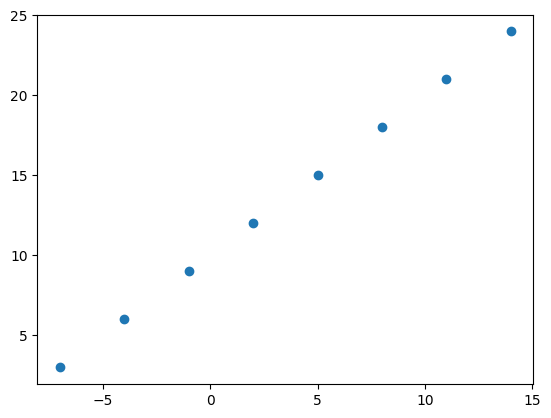

In [12]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [19]:
# # Optionally, the first layer can receive an `input_shape` argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# # Afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))
#
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16, )))
# ...
#
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [16]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochstic gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=5) # This line will error if you're running TensorFlow 2.7.0+!
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 397ms/step - loss: 17.8101 - mae: 17.8101
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 17.5288 - mae: 17.5288
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 17.2476 - mae: 17.2476
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 16.9663 - mae: 16.9663
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 16.6851 - mae: 16.6851


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 75ms/step


array([[-11.884983]], dtype=float32)

In [18]:
y_pred + 9

array([[-2.884983]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [19]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 136ms/step - loss: 16.2937 - mae: 16.2937
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 16.0124 - mae: 16.0124
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 15.7312 - mae: 15.7312
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 15.4499 - mae: 15.4499
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 15.1687 - mae: 15.1687
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 14.9062 - mae: 14.9062
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 14.7737 - mae: 14.7737
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 14.6412 - mae: 14.6412
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 14.5087 - mae: 14.5087
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 14.3762 - mae: 14.3762
Epoch 11/100
1/1 [==============================] - 0s 8m

In [20]:
# Reminder ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[29.58777]], dtype=float32)

In [22]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 311ms/step - loss: 13.8806 - mae: 13.8806
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.1720 - mae: 13.1720
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4594 - mae: 12.4594
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7393 - mae: 11.7393
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0095 - mae: 11.0095
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2673 - mae: 10.2673
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.5098 - mae: 9.5098
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7346 - mae: 8.7346
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.9392 - mae: 7.9392
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.1216 - mae: 7.1216
Epoch 11/100
1/1 [==============================] - 0s 6ms/step 

In [23]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
# Let's  try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 38ms/step


array([[27.072172]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```



When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions od a model line up against the ground truth (the original labels)?

In [25]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [26]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

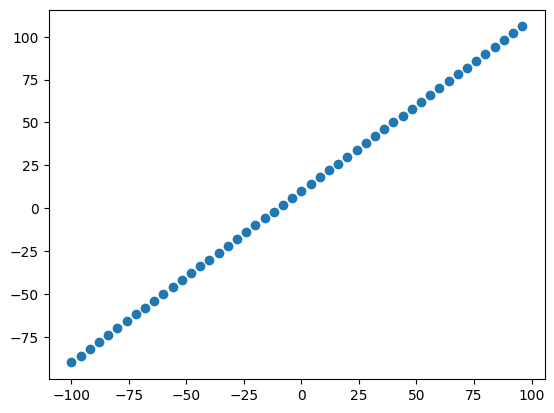

In [27]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of total data you have available.
* **Validation set** - the model gets tuned oh this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [28]:
# Check the length of how many samples we have
len(X)

50

In [29]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]
X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualing the data

Now we've got our data in training and test sets... let's visualize it again!

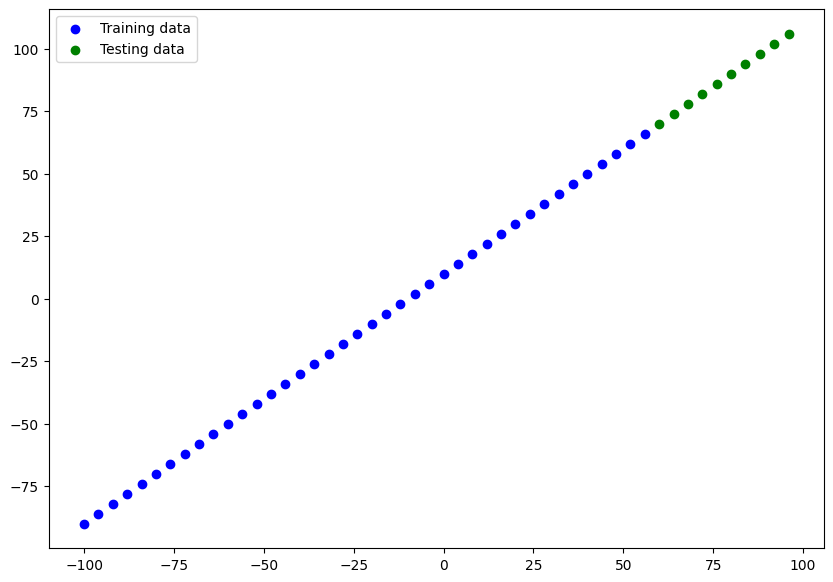

In [30]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [31]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [32]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [33]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [34]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://www.youtube.com/watch?v=QDX-1M5Nj7s&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2).

**Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary`.

In [36]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [37]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


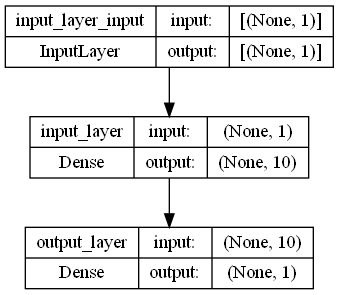

In [38]:
# from tensorflow.keras.utils import plot_model
# plot_model(model)
tf.keras.utils.plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)

In [39]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 33ms/step


array([[ 70.51809 ],
       [ 75.10498 ],
       [ 79.691895],
       [ 84.2788  ],
       [ 88.8657  ],
       [ 93.45261 ],
       [ 98.039505],
       [102.62642 ],
       [107.213326],
       [111.80022 ]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into function.

In [41]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """

    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

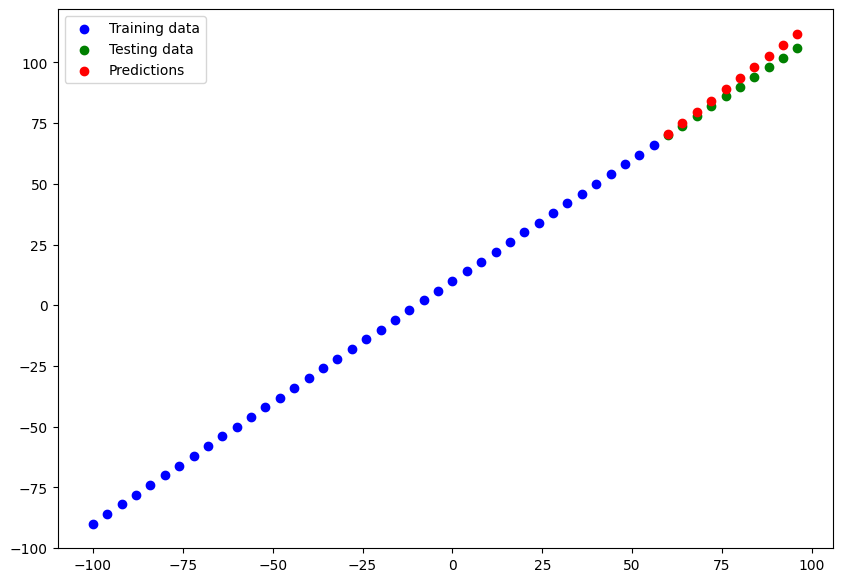

In [42]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regresion, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [43]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 74ms/step - loss: 3.1592 - mae: 3.1592


[3.159153699874878, 3.159153699874878]

In [44]:
# Calculate the mean absolute error (wrong output)
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.58553 , 14.137012, 11.723243, 10.34424 , 10.      , 10.690521,
       12.423703, 15.301135, 19.213326, 23.800217], dtype=float32)>

In [45]:
y_pred

array([[ 70.51809 ],
       [ 75.10498 ],
       [ 79.691895],
       [ 84.2788  ],
       [ 88.8657  ],
       [ 93.45261 ],
       [ 98.039505],
       [102.62642 ],
       [107.213326],
       [111.80022 ]], dtype=float32)

In [46]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.51809 ],
       [ 75.10498 ],
       [ 79.691895],
       [ 84.2788  ],
       [ 88.8657  ],
       [ 93.45261 ],
       [ 98.039505],
       [102.62642 ],
       [107.213326],
       [111.80022 ]], dtype=float32)>

In [47]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.51809 ,  75.10498 ,  79.691895,  84.2788  ,  88.8657  ,
        93.45261 ,  98.039505, 102.62642 , 107.213326, 111.80022 ],
      dtype=float32)>

In [48]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [49]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1591537>

In [50]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12.822021>

In [51]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longger - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [52]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 26.2213 - mae: 26.2213
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 8.5002 - mae: 8.5002
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 10.6813 - mae: 10.6813
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.2657 - mae: 13.2657
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 7.7520 - mae: 7.7520
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.6023 - mae: 10.6023
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.5564 - mae: 9.5564
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0074 - mae: 9.0074
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 17.8483 - mae: 17.8483
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 9.6073 - mae: 9.6073
Epoch 11/100
2/2 [==============================] - 0s 19ms/step - 

1/1 [==============================] - 0s 65ms/step


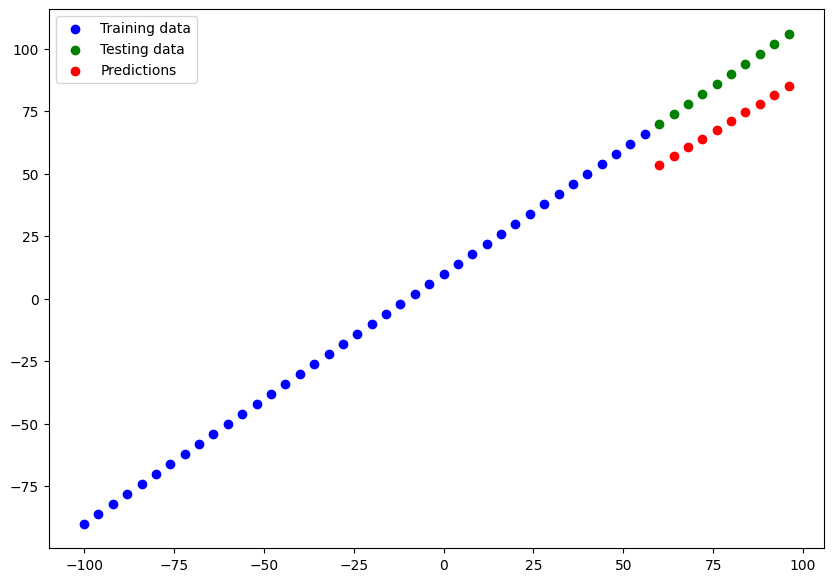

In [53]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [54]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.646034],
        [57.134228],
        [60.62242 ],
        [64.11062 ],
        [67.598816],
        [71.087006],
        [74.5752  ],
        [78.06339 ],
        [81.55159 ],
        [85.03979 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.646034, 57.134228, 60.62242 , 64.11062 , 67.598816, 71.087006,
        74.5752  , 78.06339 , 81.55159 , 85.03979 ], dtype=float32)>)

In [55]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.657091>,
 <tf.Tensor: shape=(), dtype=float32, numpy=350.24808>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [56]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 38.8972 - mae: 38.8972
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4376 - mae: 27.4376
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 33.0197 - mae: 33.0197
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 25.3502 - mae: 25.3502
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9807 - mae: 14.9807
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.9127 - mae: 11.9127
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2348 - mae: 11.2348
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1144 - mae: 11.1144
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 40.7049 - mae: 40.7049
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 28.0676 - mae: 28.0676
Epoch 11/100
2/2 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 36ms/step


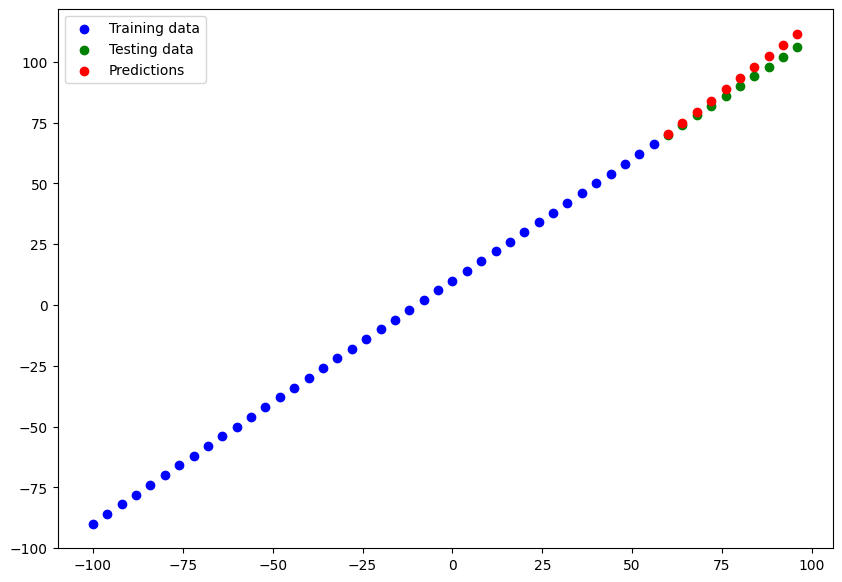

In [57]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [58]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.924868>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.274459>)

**Build `model_3`**

* 2 dense layers, trained for 500 epochs

In [59]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 27.9699 - mae: 27.9699
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 24.9467 - mae: 24.9467
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 30.2511 - mae: 30.2511
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 27.1608 - mae: 27.1608
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.8301 - mae: 14.8301
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.7972 - mae: 11.7972
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1257 - mae: 11.1257
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0679 - mae: 11.0679
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 40.1877 - mae: 40.1877
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.6176 - mae: 27.6176
Epoch 11/500
2/2 [==============================] - 0s 7m

1/1 [==============================] - 0s 33ms/step


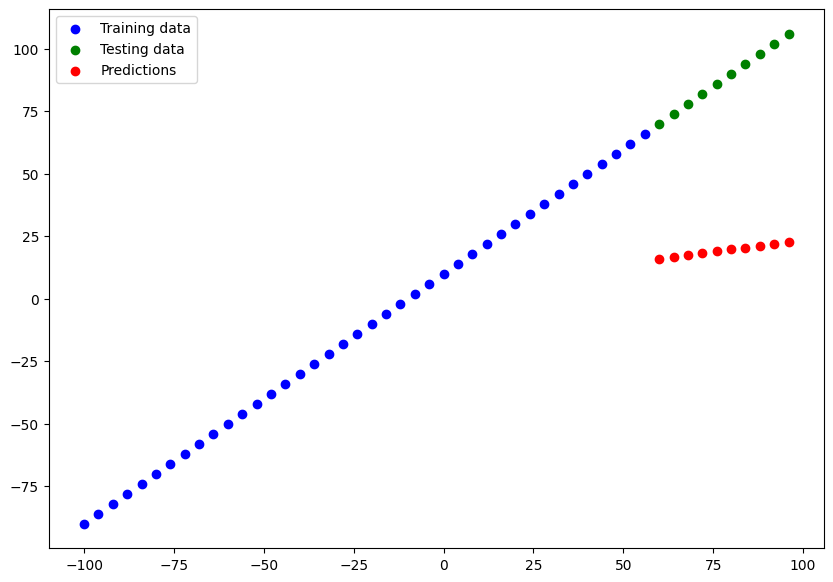

In [60]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [61]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.63775>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4797.5757>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and than increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [62]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.657091,350.248077
1,model_2,2.924868,11.274459
2,model_3,68.637749,4797.575684


In [68]:
### Look like `model_2` performed best (maybe)

In [63]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


:key **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work.Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving your models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save or model's too:
1. The SaveModel Format
2. The HDF5 format

In [64]:
# Save model using the SaveModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [65]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in saved model

In [66]:
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test);
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 65ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [68]:
# Compare the MAE of model_2 preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [69]:
# Load in model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 44ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger Example

In [71]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [72]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# Read in the insurance dataset
insurance = pd.read_csv('Dataset/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [74]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [75]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [76]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [77]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [78]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [79]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [80]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 6ms/step - loss: 8562.6787 - mae: 8562.6787
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7880.6709 - mae: 7880.6709
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7548.6553 - mae: 7548.6553
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7788.3062 - mae: 7788.3062
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7692.8218 - mae: 7692.8218
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7647.0542 - mae: 7647.0542
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7549.6392 - mae: 7549.6392
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7759.0244 - mae: 7759.0244
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7619.2573 - mae: 7619.2573
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7760.0781 - mae: 7760.0781

In [81]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 7944.6133 - mae: 7944.6133


[7944.61328125, 7944.61328125]

In [82]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model Isn't performing to well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longger (200 epochs)
3. (insert our own experiment here)

In [83]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [84]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3 Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 9ms/step - loss: 13312.5732 - mae: 13312.5732
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 13197.7500 - mae: 13197.7500
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 12939.9521 - mae: 12939.9521
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 12395.8154 - mae: 12395.8154
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 11416.1748 - mae: 11416.1758
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 10013.1123 - mae: 10013.1123
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 8552.4395 - mae: 8552.4395
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 7654.8521 - mae: 7654.8521
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 7452.1938 - mae: 7452.1938
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 7425.9526 - ma

In [85]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 13ms/step - loss: 5037.4297 - mae: 5037.4297


[5037.4296875, 5037.4296875]

In [87]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7944.6133 - mae: 7944.6133


[7944.61328125, 7944.61328125]

In [88]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 8ms/step - loss: 13294.2988 - mae: 13294.2988
Epoch 2/200
34/34 [==============================] - 0s 7ms/step - loss: 13135.5576 - mae: 13135.5576
Epoch 3/200
34/34 [==============================] - 0s 7ms/step - loss: 12796.7705 - mae: 12796.7705
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 12120.6924 - mae: 12120.6924
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 10985.5293 - mae: 10985.5293
Epoch 6/200
34/34 [==============================] - 0s 7ms/step - loss: 9539.9404 - mae: 9539.9404
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 8213.5576 - mae: 8213.5576
Epoch 8/200
34/34 [==============================] - 0s 7ms/step - loss: 7564.1567 - mae: 7564.1567
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 7450.2979 - mae: 7450.2979
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 7428.2500 - mae:

In [89]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3492.2832 - mae: 3492.2832


[3492.283203125, 3492.283203125]

In [90]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7944.6133 - mae: 7944.6133


[7944.61328125, 7944.61328125]

Text(0.5, 0, 'epochs')

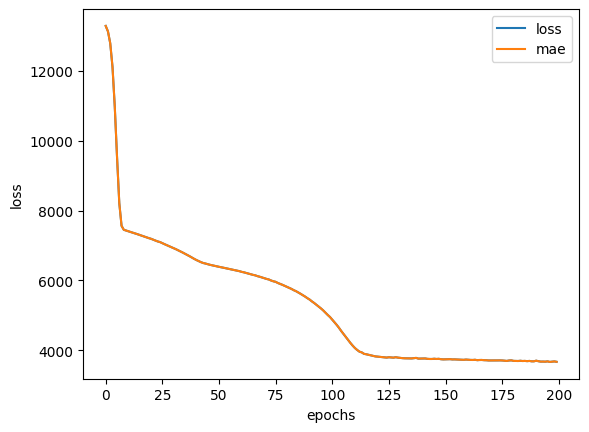

In [91]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 **Question:** How long should you train for? 

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scalimg values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("Dataset/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [94]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in theese columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [95]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [96]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [97]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [98]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 10ms/step - loss: 13344.8750 - mae: 13344.8750
Epoch 2/100
34/34 [==============================] - 0s 9ms/step - loss: 13339.3057 - mae: 13339.3057
Epoch 3/100
34/34 [==============================] - 0s 10ms/step - loss: 13324.4102 - mae: 13324.4102
Epoch 4/100
34/34 [==============================] - 0s 9ms/step - loss: 13290.4648 - mae: 13290.4648
Epoch 5/100
34/34 [==============================] - 0s 10ms/step - loss: 13226.0068 - mae: 13226.0068
Epoch 6/100
34/34 [==============================] - 0s 10ms/step - loss: 13119.6758 - mae: 13119.6758
Epoch 7/100
34/34 [==============================] - 0s 10ms/step - loss: 12960.7021 - mae: 12960.7021
Epoch 8/100
34/34 [==============================] - 0s 10ms/step - loss: 12738.5205 - mae: 12738.5205
Epoch 9/100
34/34 [==============================] - 0s 8ms/step - loss: 12442.6465 - mae: 12442.6465
Epoch 10/100
34/34 [==============================] - 0s 9ms/step - loss: 12

In [99]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3443.9329 - mae: 3443.9329


[3443.932861328125, 3443.932861328125]

In [100]:
# Insurance model 2 results
# 9/9 [==============================] - 0s 8ms/step - loss: 4895.3872 - mae: 4895.3872

In [103]:
insurance_model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1200      
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


Beautiful! Our data has been normalized and one hot encoded.
Now let's build neural network model on it and see how it goes.

<Axes: ylabel='Frequency'>

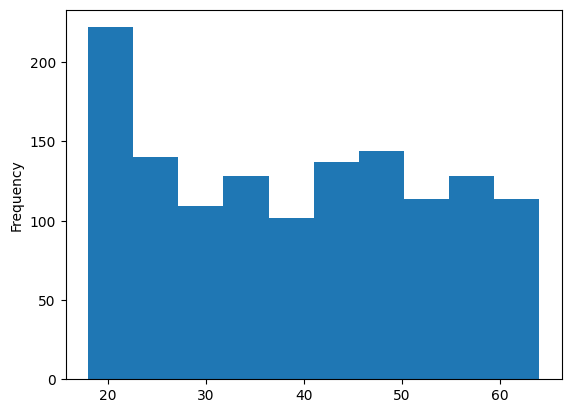

In [104]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

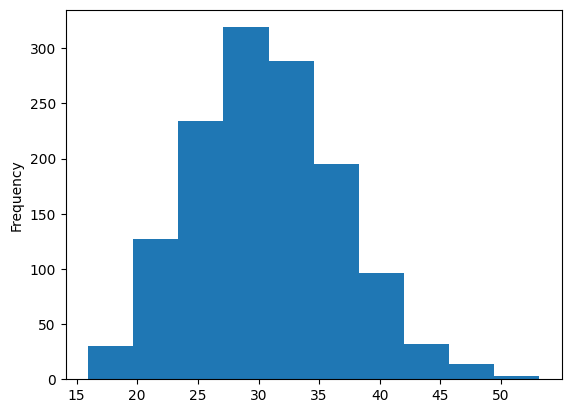

In [105]:
X["bmi"].plot(kind="hist")

In [106]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64